# **Decision Tree (classification)**
A decision tree is a supervised machine learning algorithm that uses a hierarchical, flowchart-like structure of questions or conditions to make predictions or classify data. It mimics human decision-making and can be applied to both classification (predicting categories) and regression (predicting numerical values) tasks, but here the emphasis is on classification.

![decision_tree](https://media.geeksforgeeks.org/wp-content/uploads/20250107141217134593/Decision-Tree.webp)

## The working
The dataset is split in to nodes, at every point starting from *root node*, the algorithm decides the feature to split at each level based on the **Information Gain**. This gain can be calculated with the help of impurities of each feature.
The feature having highest information gain will be the selcted to split the data set at that particular level.

$$ IG(root,\ child)=Impurity(root)-\sum _{i=1}^{k}\frac{n_{i}}{N}\times Impurity(child_{i}) $$
$$ root = The\ parent\ node,\ or\ whole\ dataset\ (for\ first\ split) $$
$$ n_{i} = The\ number\ of\ samples\ in\ the\ child_{i} $$
$$ N = The\ number\ of\ samples\ in\ the\ root $$
$$ k = The\ number\ of\ child\ created\ by\ the\ split $$

To calculate $ impurity $, we have two methods:
- **Entropy**\
Entropy is a way to calculate the impurity, or disorder of a dataset in perspective of the selected feature. It ranges from 0 (totally pure) to 1 (totally impure)\
The formula of Entropy is:
$$ Entropy(s) = -(\sum_{i=1}^{c} p_{i} * log_{2}(p_{i})) $$
$$ c = The\ number\ of\ output\ classes $$
$$ p_{i} = The\ probability\ of\ an\ output\ class\ in\ respect\ to\ that\ feature $$

- **Gini Index**\
Gini index is  also a way to calculate the impurity, Measures the probability that a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled based on the class distribution in that node. It ranges from 0 (totally pure) to 0.5 (totally impure)\
The formula of Gini is:
$$ Gini(s) = 1 - (\sum_{i=1}^{c} (p_{i})²) $$
$$ c = The\ number\ of\ output\ classes $$
$$ p_{i} = The\ probability\ of\ an\ output\ class\ in\ respect\ to\ that\ feature $$

> "Entropy" is suggested fro small data sets, otherwise "Gini index" method is more suitable

## Working for continuous values
We have understood the process in respect to categorical variables, but what if there's continuous values?\
When a decision tree encounters continuous numerical features (like age, income, or temperature), it cannot split on every individual value. Instead, it converts these numbers into binary questions (e.g., Is Age > 30?) using a threshold-based search. It tries different threshold values and check for Infortmation Gain, again the highest one is taken.

## Tree Pruning
Tree pruning is a critical machine learning technique used to simplify decision trees by removing branches that contribute little to predictive power. This process is essential for building a robust and reliable model. The primary reason for pruning is to prevent overfitting. Unpruned decision trees tend to grow until every leaf node is "pure," meaning the model essentially memorizes the training data, including noise and outliers.

### There are two types of pruning techniques
- **Post Pruning (Backward pruning)**\
The tree is first allowed to grow to its full depth, and then unnecessary branches are removed. This can be used in smaller trees as in big data sets, the tree can grow very large and it will be hard to prune it later.

- **Pre pruning (Early stopping)**\
This technique halts the tree's growth during construction if specific thresholds are met, this is ideal for large data sets as no extra computation is required to make unnecessary branches. It is basically hyperparameter tuning where we decide parameters like `max_depth`, `max_leaf_nodes`.

## Implementation of Decision Tree classifier

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# get the iris data set
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
X, y

(     sepal length  sepal width  petal length  petal width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [118]:
# divide into test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# train the model
from sklearn.tree import DecisionTreeClassifier
decision_tree_classify = DecisionTreeClassifier()
decision_tree_classify.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 

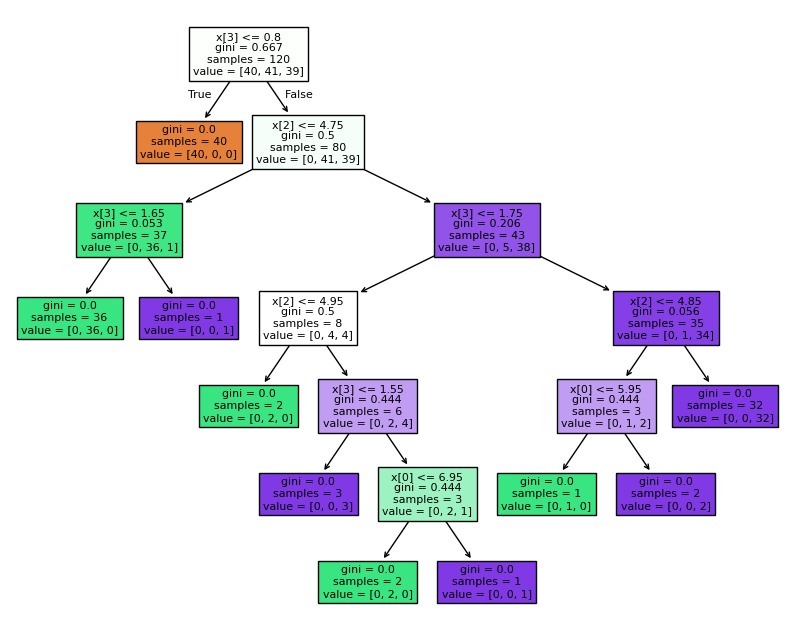

In [120]:
# visualise the tree
from sklearn import tree
plt.figure(figsize=(10, 8))
tree.plot_tree(decision_tree_classify, filled=True)

In [121]:
# make predictions
y_pred = decision_tree_classify.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [122]:
# check for the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

